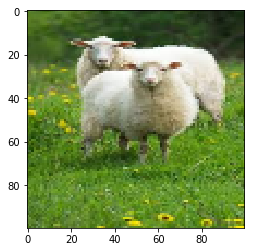

In [117]:
import os
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

raw_image = cv2.imread('images/sheep.jpeg')
image = cv2.resize(cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB), (100, 100))
pixels_array = image.reshape((image.shape[0]*image.shape[1], 3))
centroids = pixels_array.copy()
plt.imshow(image)
plt.show()
plt.close()

In [ ]:
def remove_duplicate_centroids(centroids):
    _, index = np.unique(centroids.dot([1, 1000, 1000000]), return_index=True) # hash 
    return np.array([centroids[k] for k in index])


def mean_shift_epoch(pixels_array, centroids, bandwidth):
    for i, centroid in enumerate(centroids):
        avg = np.zeros(3)
        num_neighbors = 0
        for pixel in pixels_array:
            if np.linalg.norm(centroid-pixel) <= bandwidth:
                avg += pixel
                num_neighbors += 1
        if num_neighbors == 0:
            # idk why num_neighbors is 0
            np.delete(centroids, centroids[i])
        else:
            centroids[i] = np.round(avg/num_neighbors)
    return remove_duplicate_centroids(centroids)


def centroids_to_image(centroids, image):
    print('Creating clustered image')
    shape = image.shape
    clustered_image = np.zeros(shape)
    for x in range(shape[0]):
        for y in range(shape[1]):
            distances = [np.linalg.norm(image[x][y]-centroid) for centroid in centroids]
            closest_centroid_index = np.argmin(distances)
            clustered_image[x][y] = centroids[closest_centroid_index]
    return clustered_image.astype(int)

Beginning Mean Shift Algorithm
Creating clustered image


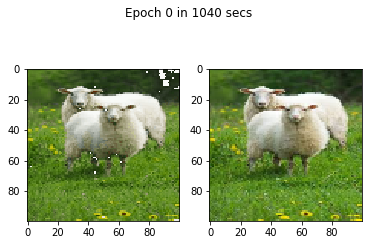

Creating clustered image


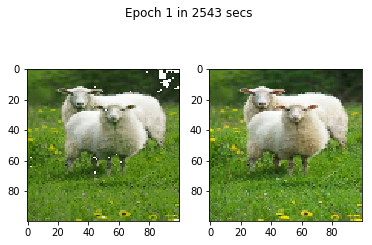

Creating clustered image


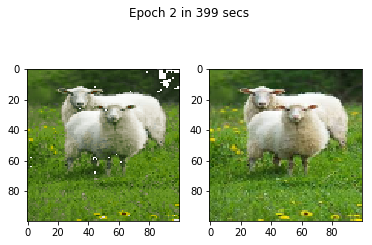

Creating clustered image


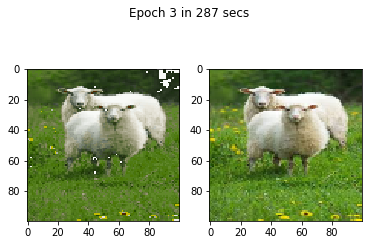

Creating clustered image


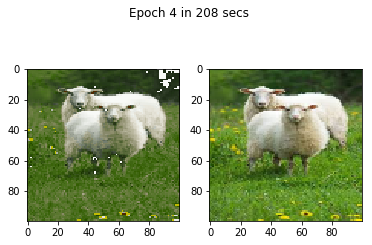

Creating clustered image


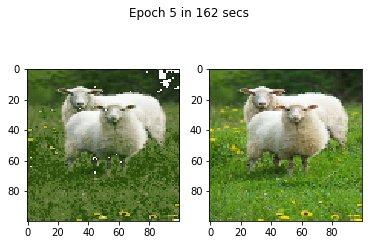

Creating clustered image


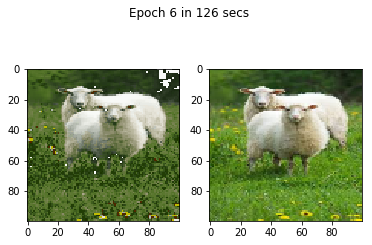

Creating clustered image


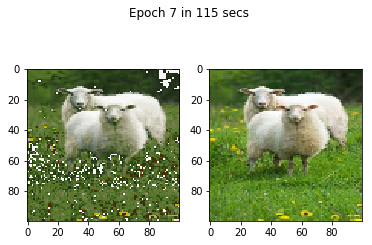

Creating clustered image


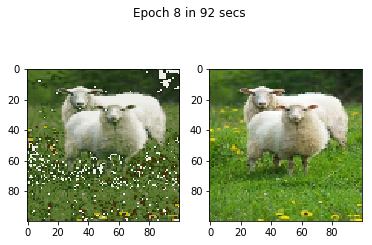

Creating clustered image


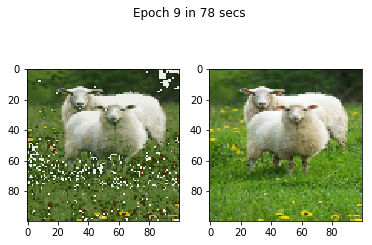

Creating clustered image


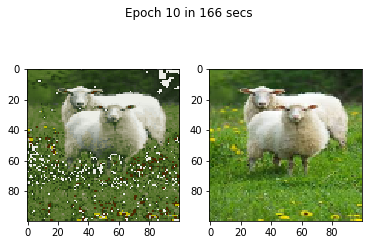

Creating clustered image


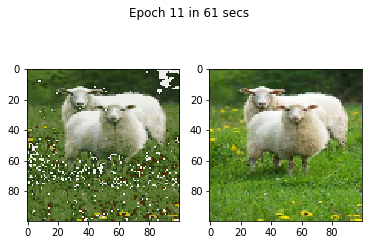

Creating clustered image


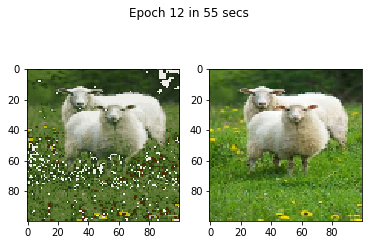

Creating clustered image


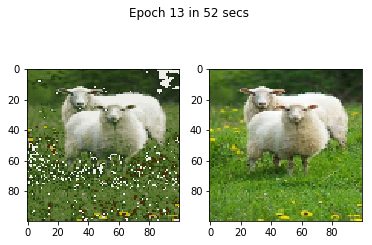

Creating clustered image


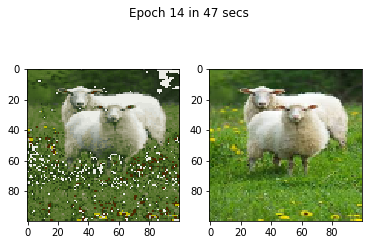

Creating clustered image


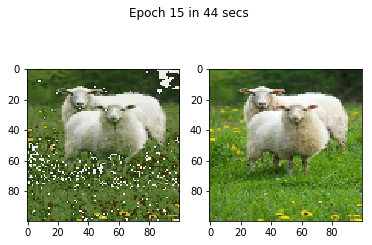

Creating clustered image


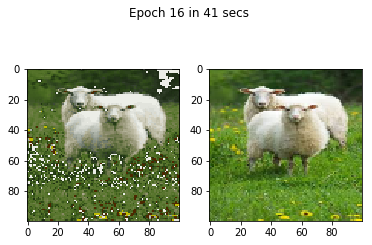

Creating clustered image


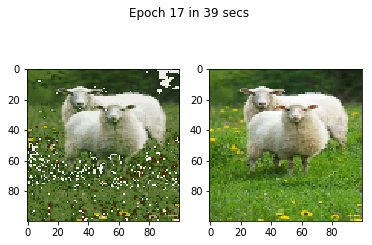

Creating clustered image


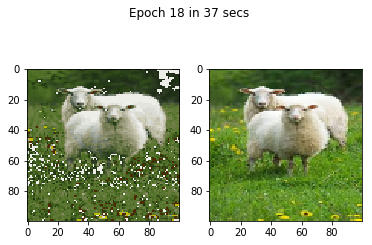

Creating clustered image


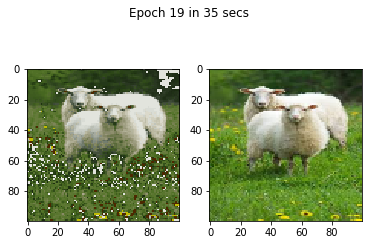

Creating clustered image


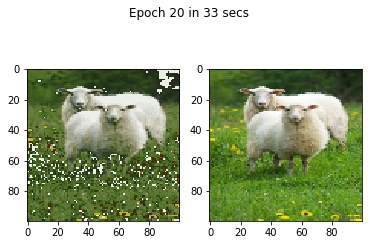

Creating clustered image


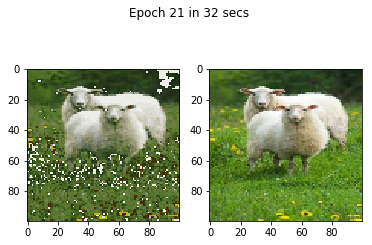

Creating clustered image


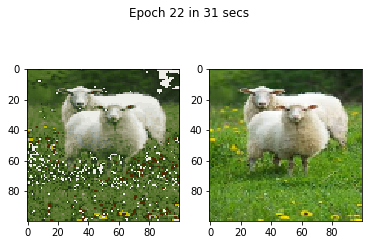

Creating clustered image


In [ ]:
bandwidth = 75
epochs = 30
print('Beginning Mean Shift Algorithm')
for epoch in range(epochs):
    now = time.time()
    centroids = mean_shift_epoch(pixels_array, centroids, bandwidth)
    
    segmented_image = centroids_to_image(centroids, image)
    plt.suptitle('Epoch {0} in {1} secs'.format(epoch, round(time.time()-now)))
    plt.subplot(1, 2, 1)
    plt.imshow(segmented_image)

    plt.subplot(1, 2, 2)
    plt.imshow(image)
    plt.show()
    plt.close()


In [121]:
print(centroids.tolist())

[[77, 40, 0], [192, 187, 2], [27, 43, 16], [27, 44, 16], [29, 47, 16], [28, 46, 17], [30, 48, 17], [30, 49, 17], [31, 50, 17], [28, 43, 18], [29, 48, 18], [30, 49, 18], [29, 45, 19], [32, 51, 19], [32, 52, 19], [34, 56, 19], [29, 44, 20], [32, 51, 20], [33, 53, 20], [33, 54, 20], [34, 54, 20], [37, 59, 20], [29, 43, 21], [31, 48, 21], [38, 61, 21], [39, 62, 21], [39, 63, 21], [42, 67, 21], [30, 45, 22], [32, 50, 22], [33, 53, 22], [34, 54, 22], [35, 56, 22], [40, 64, 22], [44, 70, 22], [36, 56, 23], [41, 65, 23], [44, 70, 23], [45, 71, 23], [46, 73, 23], [32, 46, 24], [39, 61, 24], [48, 74, 25], [49, 76, 25], [38, 58, 26], [46, 71, 26], [50, 78, 26], [51, 78, 26], [51, 79, 26], [53, 82, 26], [36, 52, 27], [41, 62, 27], [52, 80, 27], [53, 82, 27], [39, 57, 28], [43, 65, 28], [50, 76, 28], [57, 87, 28], [51, 78, 29], [54, 81, 29], [60, 90, 29], [60, 91, 29], [61, 92, 29], [62, 92, 29], [63, 94, 30], [66, 98, 30], [55, 80, 31], [69, 101, 31], [64, 94, 32], [69, 101, 32], [70, 102, 32], [4